## Семинар 2

# Тема: Построение 3D-графиков. Метод градиентного спуска

Импортируем необходимые библиотеки:

In [1]:
import numpy as np
import pandas as pnd
import matplotlib.pyplot as plt

### Пример построения 3D-графика функции $z = x^2 + y^2$ на квадрате $[-10;10]\times[-10;10]$.

In [3]:
def z(x, y):
    return x**2 + y**2

In [4]:
N = 100
x = np.linspace(-10,10,N)
y = np.linspace(-10,10,N)
x_grid, y_grid = np.meshgrid(x, y)

In [5]:
x_grid

array([[-10.       ,  -9.7979798,  -9.5959596, ...,   9.5959596,
          9.7979798,  10.       ],
       [-10.       ,  -9.7979798,  -9.5959596, ...,   9.5959596,
          9.7979798,  10.       ],
       [-10.       ,  -9.7979798,  -9.5959596, ...,   9.5959596,
          9.7979798,  10.       ],
       ...,
       [-10.       ,  -9.7979798,  -9.5959596, ...,   9.5959596,
          9.7979798,  10.       ],
       [-10.       ,  -9.7979798,  -9.5959596, ...,   9.5959596,
          9.7979798,  10.       ],
       [-10.       ,  -9.7979798,  -9.5959596, ...,   9.5959596,
          9.7979798,  10.       ]])

In [10]:
z_grid = z(x_grid, y_grid)

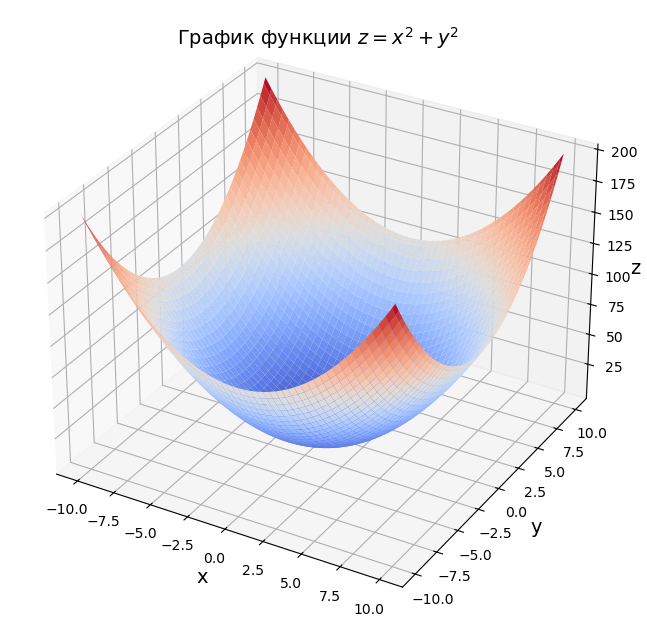

In [12]:
fig = plt.figure(figsize = [10, 8])
ax = fig.add_subplot(projection='3d')
ax.plot_surface(x_grid, y_grid, z_grid, cmap='coolwarm')

ax.set_title('График функции $z = x^2 + y^2$', fontsize=14, y = 1.01 )
ax.set_xlabel('x', fontsize=14)
ax.set_ylabel('y', fontsize=14)
ax.set_zlabel('z', fontsize=14, labelpad = -2)

plt.show()

### Метод градиентного спуска
Функция $y = f(x_1, x_2,\dots , x_n)$ - непрерывно-дифференцируемая и выпукла.

Требуется найти некоторую точку $(x^{*}_1, x^{*}_2,\dots , x^{*}_n)$ локального минимума этой функции.

*Для применения метода градиентного спуска нужно выполнить следующие действия*:
1) Вычислить градиент функции:
$\overrightarrow {grad f} = (\frac{\partial f}{\partial x_1}, \frac{\partial f}{\partial x_2} , \dots,  \frac{\partial f}{\partial x_n})^T$
2) Задать начальное значение $(x^{0}_1, x^{0}_2,\dots , x^{0}_n)^T$

3) Задать скорость обучения (learning rate) $\alpha = \alpha_0$

4) Задать количество шагов градиентного спуска $k = k_0$

5) На каждом шаге менять все переменные, от которых зависит функция, по формуле:

$$\vec{x}^{j+1} = \vec{x}^{j} - \alpha \cdot \overrightarrow{grad f} (x_{1}^{j},x_{2}^{j},\dots ,x_{n}^{j}), j = 0, 1, ..., k_0 -1$$


### Пример нахождения точки минимума функции $f(w) =w ^ 2$ методом градиентного спуска.
Считаем, что точка минимума найдена, если значение производной в ней равно нулю с точностью 4-знака после запятой. Метод градиентного спуска может расходиться. Будем считать, что он расходится, если числа становятся велики (больше 1000000).

In [16]:
def derivative_f(w):
    return 2 * w

In [18]:
def Gradient_Discent(derivative_f, w_start, learning_rate=0.1, max_iter=100):
    """
    Реализация градиентного спуска для функций с одним локальным минимумом, совпадающим с глобальным.
    """
    w = w_start
    for _ in range(max_iter):
        w = w - learning_rate * derivative_f(w)
        #print( w, derivative_f(w))
    assert -1e+06 < w and w < 1e+06, "Расходимость: слишком большой learning_rate, либо неудачно выбрана начальная точка, либо минимум не достигается"
    assert -1e-04 < derivative_f(w) and derivative_f(w) < 1e-04, "Недостаточно шагов градиентного спуска"

    return w

In [20]:
w_min = Gradient_Discent(derivative_f, w_start=np.random.random(1))

In [22]:
np.round(w_min)

array([0.])

# Задания для самостоятельного выполнения

### 1. Задайте квадратную область на плоскости $[-5;5]\times[0;10]$ cеткой точек $10\times 10$. Визуализируйте эти точки на диаграмме рассеивания.
Указание: Используйте метод [meshgrid](https://numpy.org/doc/stable/reference/generated/numpy.meshgrid.html) библиотеки numpy.

In [26]:
N = 10
x = np.linspace(-5,5,N)
y = np.linspace(0,10,N)
x_grid, y_grid = np.meshgrid(x, y)

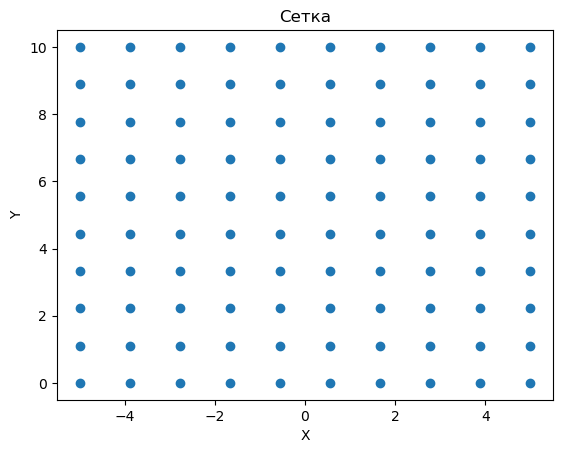

In [28]:
plt.scatter(x_grid, y_grid)
plt.title('Сетка')
plt.xlabel('X')
plt.ylabel('Y')
plt.show()

### 2. Запрограммируйте функцию $z = x^2 + (y - 5)^2 + 4$. Вычислите значения этой функции в точках, построенной сетки.

In [31]:
def f(x, y):
  return x**2 + (y - 5)**2 + 4

In [33]:
z_grid = f(x_grid, y_grid)

In [35]:
z_grid

array([[54.        , 44.12345679, 36.71604938, 31.77777778, 29.30864198,
        29.30864198, 31.77777778, 36.71604938, 44.12345679, 54.        ],
       [44.12345679, 34.24691358, 26.83950617, 21.90123457, 19.43209877,
        19.43209877, 21.90123457, 26.83950617, 34.24691358, 44.12345679],
       [36.71604938, 26.83950617, 19.43209877, 14.49382716, 12.02469136,
        12.02469136, 14.49382716, 19.43209877, 26.83950617, 36.71604938],
       [31.77777778, 21.90123457, 14.49382716,  9.55555556,  7.08641975,
         7.08641975,  9.55555556, 14.49382716, 21.90123457, 31.77777778],
       [29.30864198, 19.43209877, 12.02469136,  7.08641975,  4.61728395,
         4.61728395,  7.08641975, 12.02469136, 19.43209877, 29.30864198],
       [29.30864198, 19.43209877, 12.02469136,  7.08641975,  4.61728395,
         4.61728395,  7.08641975, 12.02469136, 19.43209877, 29.30864198],
       [31.77777778, 21.90123457, 14.49382716,  9.55555556,  7.08641975,
         7.08641975,  9.55555556, 14.49382716

### 3. Постройте 3D-график функции  $z = x^2 + (y - 5)^2 + 4$ на квадрате $[-5;5]\times[0;10]$, используя построенную сетку. Изобразите на графике и саму сетку.
Указание: Для изображения сетки используйте метод [scatter3D](https://matplotlib.org/stable/gallery/mplot3d/scatter3d.html), указав по третьей координате нули.

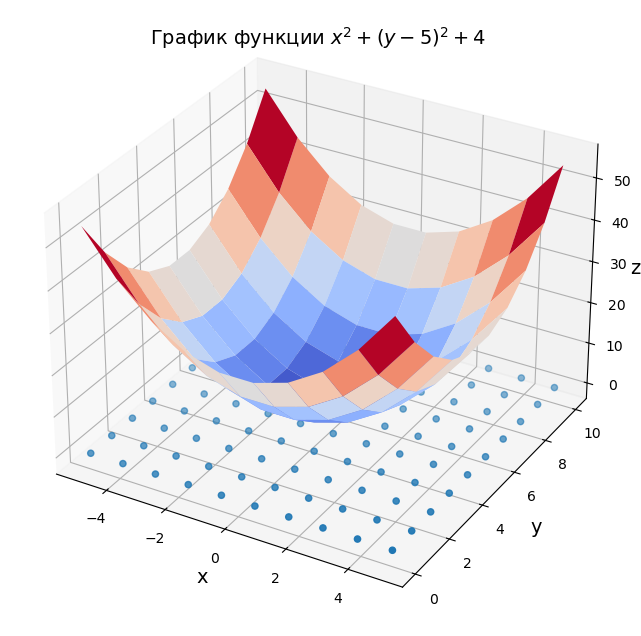

In [38]:
fig = plt.figure(figsize = [10, 8])
ax = fig.add_subplot(projection='3d')
ax.plot_surface(x_grid, y_grid, z_grid, cmap='coolwarm')
ax.scatter3D(x_grid, y_grid, np.zeros(x_grid.shape))

ax.set_title('График функции $x^2 + (y - 5)^2 + 4$', fontsize=14, y = 1.01 )
ax.set_xlabel('x', fontsize=14)
ax.set_ylabel('y', fontsize=14)
ax.set_zlabel('z', fontsize=14, labelpad = -2)

plt.show()

### 4. Постройте 3D-график функции $z = x^2 + (y - 5)^2 + 4$ на квадрате $[-5;5]\times[0;10]$, используя более мелкую сетку размера $100\times 100$. Саму сетку изображать не нужно. Поменяйте угол обзора графика.
Указание: При помощи ax.view_init(elev=35, azim=20) поменяйте угол обзора графика.

In [41]:
N = 100
x = np.linspace(-5,5,N)
y = np.linspace(0,10,N)
x_grid, y_grid = np.meshgrid(x, y)
z_grid=x_grid**2+(y_grid-5)**2+4

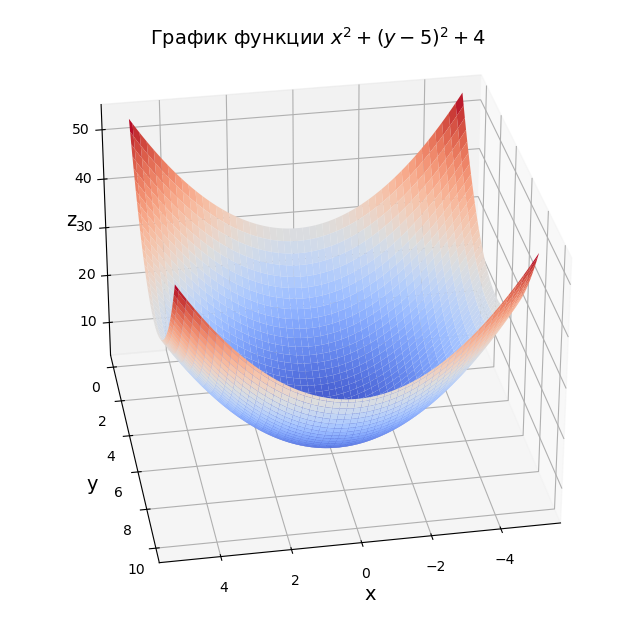

In [43]:
fig = plt.figure(figsize = [10, 8])
ax = fig.add_subplot(projection='3d')
ax.plot_surface(x_grid, y_grid, z_grid, cmap='coolwarm')

ax.set_title('График функции $x^2 + (y - 5)^2 + 4$', fontsize=14, y = 1.01 )
ax.set_xlabel('x', fontsize=14)
ax.set_ylabel('y', fontsize=14)
ax.set_zlabel('z', fontsize=14, labelpad = -2)
ax.view_init(elev=30, azim=80)
plt.show()

### 5. Постройте 2D-график линий уровня функции  $z = x^2 + (y - 5)^2 + 4$ на квадрате $[-5;5]\times[0;10]$.
Указание: Используйте метод [contour](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.contour.html) библиотеки matplotlib.

In [45]:
N = 100
x = np.linspace(-5,5,N)
y = np.linspace(0,10,N)

x_grid, y_grid = np.meshgrid(x, y)
z_grid=x_grid**2+(y_grid-5)**2+4

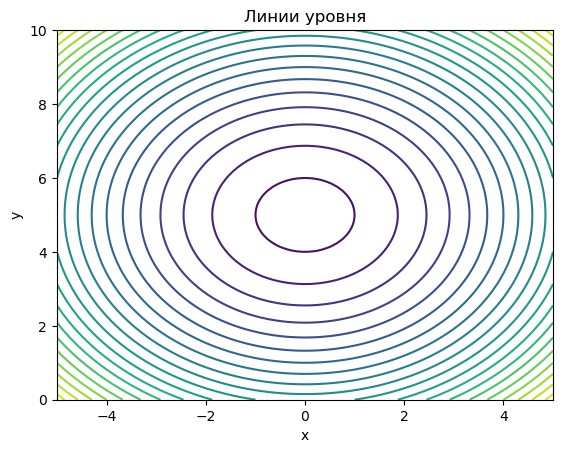

In [46]:
plt.contour(x_grid, y_grid, z_grid, levels = 20)
plt.title('Линии уровня')
plt.xlabel('x')
plt.ylabel('y')
plt.show()

### 6. Постройте 3D-график линий уровня функции $z = x^2 + (y - 5)^2 + 4$ на квадрате $[-5;5]\times[0;10]$.

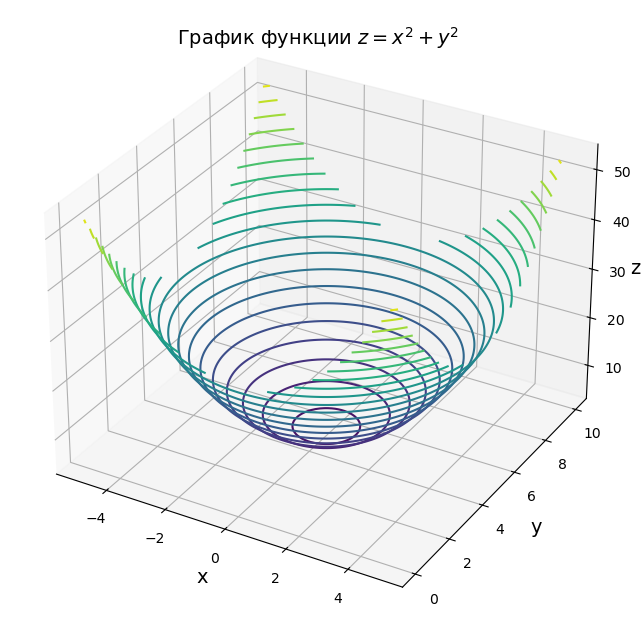

In [50]:
fig = plt.figure(figsize = [10, 8])
ax = fig.add_subplot(projection='3d')
ax.contour(x_grid, y_grid, z_grid, levels = 20)
ax.set_title('График функции $z = x^2 + y^2$', fontsize=14, y = 1.01 )
ax.set_xlabel('x', fontsize=14)
ax.set_ylabel('y', fontsize=14)
ax.set_zlabel('z', fontsize=14, labelpad = -2)
#ax.view_init(elev=0, azim=0)
plt.show()

### 7. Постройте на одном 3D-графике функцию $z = x^2 + (y - 5)^2 + 4$ на квадрате $[-5;5]\times[0;10]$ и её линии уровня.
Указание: Для этого при построении поверхности укажите параметр прозрачности alpha=0.5.

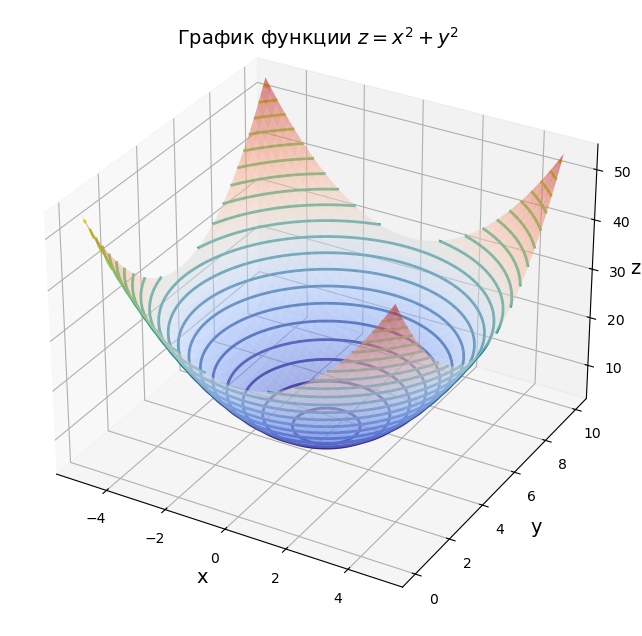

In [54]:
fig = plt.figure(figsize = [10, 8])
ax = fig.add_subplot(projection='3d')
ax.plot_surface(x_grid, y_grid, z_grid, cmap='coolwarm', alpha=0.5)
ax.contour(x_grid, y_grid, z_grid, levels = 20, linewidths=2)
ax.set_title('График функции $z = x^2 + y^2$', fontsize=14, y = 1.01 )
ax.set_xlabel('x', fontsize=14)
ax.set_ylabel('y', fontsize=14)
ax.set_zlabel('z', fontsize=14, labelpad = -2)
#ax.view_init(elev=0, azim=0)
plt.show()

### 8. Запрограммируйте функцию $f(w) =(w - 3 ) ^ 2$ и её производную. Вычислите значение функции и её производной в случайной точке.

In [56]:
def f(w):
  return (w - 3)**2

def def_f(w):
  return 2*(w - 3)

In [58]:
f(np.random.uniform(-10,10))

25.763756501301184

In [61]:
def_f(np.random.uniform(-10,10))

-24.466438499419144

### 9. Методом градиентного спуска найдите точку минимума функции одной переменной $f(w) =(w - 3 ) ^ 2$.
Указание: Для этого напишите функцию GD_1d, принимающую на вход производную функции одной переменной, начальную точуку, скорость обучения, количество шагов и реализующую метод градиентного спуска. Пусть эта функция возвращает не только саму точку минимума, а numpy-массив значений x на каждом шаге градиентного спуска.

In [64]:
def derivative_f(w):
    return 2*(w-3)

def GD_1d(derivative_f, w_start, learning_rate=0.1, max_iter=100):
    w_values=[]
    w = w_start[0]
    w_values.append(round(w, 5))
    for _ in range(max_iter):
        w = w - learning_rate * derivative_f(w)
        w_values.append(round(w, 5))
    assert -1e+06 < w and w < 1e+06, "Расходимость: слишком большой learning_rate, либо неудачно выбрана начальная точка, либо минимум не достигается"
    assert -1e-04 < derivative_f(w) and derivative_f(w) < 1e-04, "Недостаточно шагов градиентного спуска"
    return w, np.array(w_values)

w_min, w_values = GD_1d(derivative_f, w_start=np.random.random(1))
w_min

2.999999999528756

In [66]:
w_values

array([0.68662, 1.14929, 1.51944, 1.81555, 2.05244, 2.24195, 2.39356,
       2.51485, 2.61188, 2.6895 , 2.7516 , 2.80128, 2.84103, 2.87282,
       2.89826, 2.91861, 2.93488, 2.94791, 2.95833, 2.96666, 2.97333,
       2.97866, 2.98293, 2.98634, 2.98908, 2.99126, 2.99301, 2.99441,
       2.99553, 2.99642, 2.99714, 2.99771, 2.99817, 2.99853, 2.99883,
       2.99906, 2.99925, 2.9994 , 2.99952, 2.99962, 2.99969, 2.99975,
       2.9998 , 2.99984, 2.99987, 2.9999 , 2.99992, 2.99994, 2.99995,
       2.99996, 2.99997, 2.99997, 2.99998, 2.99998, 2.99999, 2.99999,
       2.99999, 2.99999, 2.99999, 3.     , 3.     , 3.     , 3.     ,
       3.     , 3.     , 3.     , 3.     , 3.     , 3.     , 3.     ,
       3.     , 3.     , 3.     , 3.     , 3.     , 3.     , 3.     ,
       3.     , 3.     , 3.     , 3.     , 3.     , 3.     , 3.     ,
       3.     , 3.     , 3.     , 3.     , 3.     , 3.     , 3.     ,
       3.     , 3.     , 3.     , 3.     , 3.     , 3.     , 3.     ,
       3.     , 3.  

### 10. Визуализируйте процесс нахождения точки минимума функции $f(w) =(w - 3 ) ^ 2$ c learning_rate=0.1 и с learning_rate=0.9.
Указание: Для этого напишите функцию plot_GD_1d, принимающую на вход функцию одной переменной и шаги градиентного спуска, которая строит график этой функции и отмечает на нём точками шаги градиентного спуска, соединённые между собой пунктирной линией.

In [69]:
def f(w):
    return (w - 3)**2

def derivative_f(w):
    return 2*(w-3)

def GD_1d(derivative_f, w_start, learning_rate, max_iter=100):
    w_values=[]
    w = w_start[0]
    w_values.append(w)
    for _ in range(max_iter):
        w = w - learning_rate * derivative_f(w)
        w_values.append(w)
    assert -1e+06 < w and w < 1e+06, "Расходимость: слишком большой learning_rate, либо неудачно выбрана начальная точка, либо минимум не достигается"
    assert -1e-04 < derivative_f(w) and derivative_f(w) < 1e-04, "Недостаточно шагов градиентного спуска"
    return w_values

def plot_GD_1d(learning_rate):
    w_values=GD_1d(derivative_f, w_start=np.random.random(1), learning_rate=learning_rate)
    x_coord=np.linspace(-1, 7, 400)
    plt.figure(figsize=(10,7))
    plt.xlabel('w')
    plt.ylabel('f(w)')
    plt.plot(x_coord, f(x_coord), color='#add6ff')
    plt.scatter(w_values, f(np.array(w_values)), color='r')
    plt.plot(w_values, f(np.array(w_values)), linestyle='--', color='r')

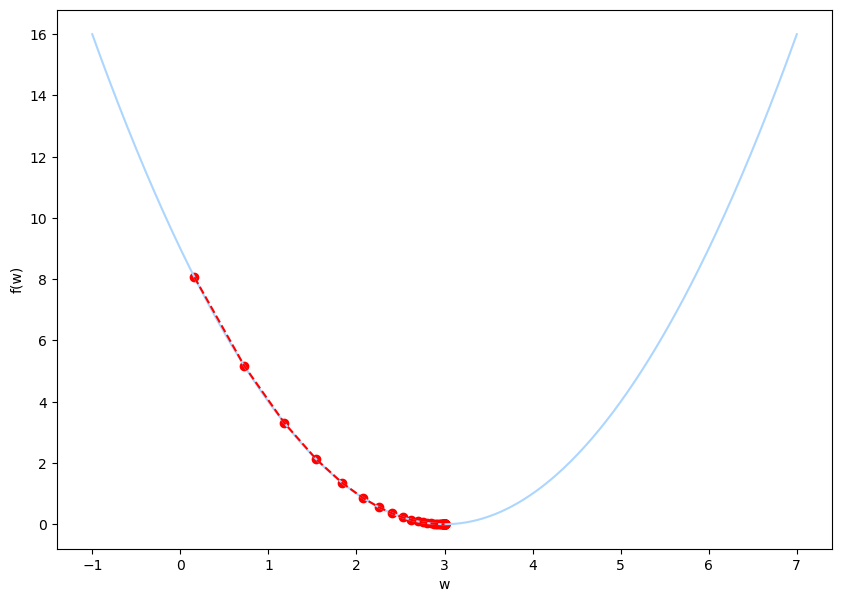

In [71]:
plot_GD_1d(learning_rate=0.1)

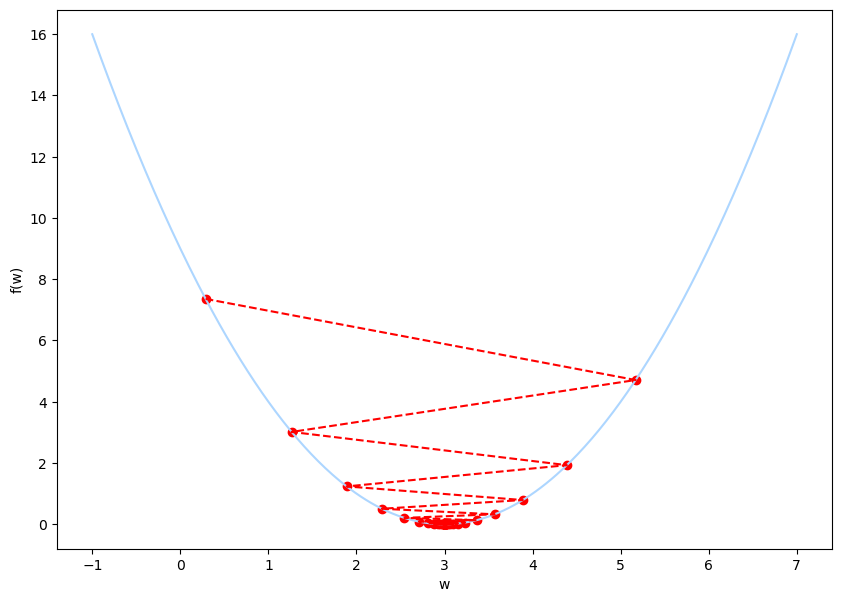

In [72]:
plot_GD_1d(learning_rate=0.9)

### 11. Запрограммируйте функцию $F(w_1,w_2) ={w_1}^2 + ({w_2} - 3)^2 + 1$, а также её градиент. Вычислите значение и градиент этой функции в случайной точке.

In [76]:
def f(w):
    return w[0]**2 + (w[1]-3)**2 + 1

In [78]:
def gradient_f(w):
    return np.array([2*w[0], 2*(w[1]-3)])

In [80]:
w=np.random.random(2)
w

array([0.71585824, 0.31867768])

In [82]:
f(w)

8.701942414186139

In [84]:
gradient_f(w)

array([ 1.43171648, -5.36264464])

### 12. Реализуйте метод градиентного спуска и найдите точку минимума функции двух переменных $F(w_1,w_2) ={w_1}^2 + ({w_2} - 3)^2 + 1$.
Указание: Для этого модифицируйте функцию GD_1d в функцию GD_2d, принимающую на вход градиент, начальную точуку, скорость обучения, количество шагов и реализующую метод градиентного спуска. Обратите внимание, что стартовая точка теперь состоит из двух значений.

In [87]:
def GD_1d(derivative_f, w_start, learning_rate, max_iter=100):
    w_values=[]
    w = w_start[0]
    w_values.append(w)
    for _ in range(max_iter):
        w = w - learning_rate * derivative_f(w)
        w_values.append(w)
    assert -1e+06 < w and w < 1e+06, "Расходимость: слишком большой learning_rate, либо неудачно выбрана начальная точка, либо минимум не достигается"
    assert -1e-04 < derivative_f(w) and derivative_f(w) < 1e-04, "Недостаточно шагов градиентного спуска"
    return w_values


In [89]:
def GD_2d(gradient_f,w_start=np.random.random(2),learning_rate=0.9,max_iter=100):
    w=w_start
    w_values=[w]
    
    for i in range(max_iter):
        w=w-learning_rate * gradient_f(w)
        w_values.append(w)
    assert (-1e+06 < w).all() and (w < 1e+06).all(), "Расходимость: слишком большой learning_rate, либо неудачно выбрана начальная точка, либо минимум не достигается"
    assert (-1e-04 < gradient_f(w)).all() and (gradient_f(w)< 1e-04).all(), "Недостаточно шагов градиентного спуска"
   
    return w,np.array(w_values)



In [91]:
w_min,w_values=GD_2d(gradient_f, learning_rate=0.1, max_iter=100)

In [93]:
w_min

array([6.38115169e-11, 3.00000000e+00])

In [95]:
w_values

array([[3.13256701e-01, 6.08577580e-01],
       [2.50605361e-01, 1.08686206e+00],
       [2.00484288e-01, 1.46948965e+00],
       [1.60387431e-01, 1.77559172e+00],
       [1.28309945e-01, 2.02047338e+00],
       [1.02647956e-01, 2.21637870e+00],
       [8.21183646e-02, 2.37310296e+00],
       [6.56946917e-02, 2.49848237e+00],
       [5.25557533e-02, 2.59878590e+00],
       [4.20446027e-02, 2.67902872e+00],
       [3.36356821e-02, 2.74322297e+00],
       [2.69085457e-02, 2.79457838e+00],
       [2.15268366e-02, 2.83566270e+00],
       [1.72214692e-02, 2.86853016e+00],
       [1.37771754e-02, 2.89482413e+00],
       [1.10217403e-02, 2.91585930e+00],
       [8.81739226e-03, 2.93268744e+00],
       [7.05391380e-03, 2.94614995e+00],
       [5.64313104e-03, 2.95691996e+00],
       [4.51450483e-03, 2.96553597e+00],
       [3.61160387e-03, 2.97242878e+00],
       [2.88928309e-03, 2.97794302e+00],
       [2.31142648e-03, 2.98235442e+00],
       [1.84914118e-03, 2.98588353e+00],
       [1.479312

### 13. Визуализируйте процесс нахождения точки минимума функции $F(w_1,w_2) ={w_1}^2 + ({w_2} - 3)^2 + 1$, когда градиентный спуск реализуется с learning_rate = 0.2.
Указание: Для этого напишите функцию plot_GD_2d, которая принимает на вход функцию двух переменных и шаги градиентного спуска, а строит график этой функции с линиями уровня и отмечает на нём точки шагов градиентного спуска, соединённые между собой ломаной линией. Для наглядности в функции plot_GD_2d разверните пространственный график на угол с azim=0.

In [98]:
# Визуализация траектории градиентного спуска (по желанию)
def plot_GD_2d(F,w_values):
    h=1
    w1_values = np.linspace(w_values[:,0].min()-h, w_values[:,0].max()+h, 100)
    w2_values = np.linspace(w_values[:,1].min()-h, w_values[:,1].max()+h, 100)
    W1, W2 = np.meshgrid(w1_values, w2_values)
    Z = F(np.array([W1.ravel(),W2.ravel()])).reshape(W1.shape)
    

    plt.figure(figsize=(10, 6))
    plt.contour(W1, W2, Z, levels=50)

    plt.plot(w_values[:, 0], w_values[:, 1], marker='o', color='red', markersize=5)
    plt.title('Градиентный спуск для функции F(w1,w2)')
    plt.xlabel('w1')
    plt.ylabel('w2')

    plt.grid()
    plt.show()

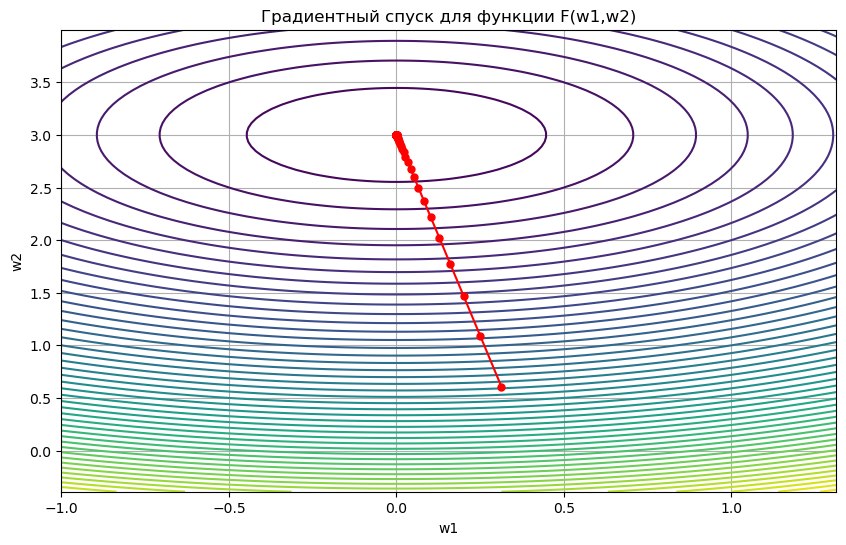

In [100]:
plot_GD_2d(f,w_values)

### 14. Визуализируйте процесс нахождения точки минимума функции $F(w_1,w_2) ={w_1}^2 + ({w_2} - 3)^2 + 1$, когда градиентный спуск реализуется с learning_rate = 0.8.

In [103]:
w_min,w_values=GD_2d(gradient_f, learning_rate=0.8, max_iter=100)

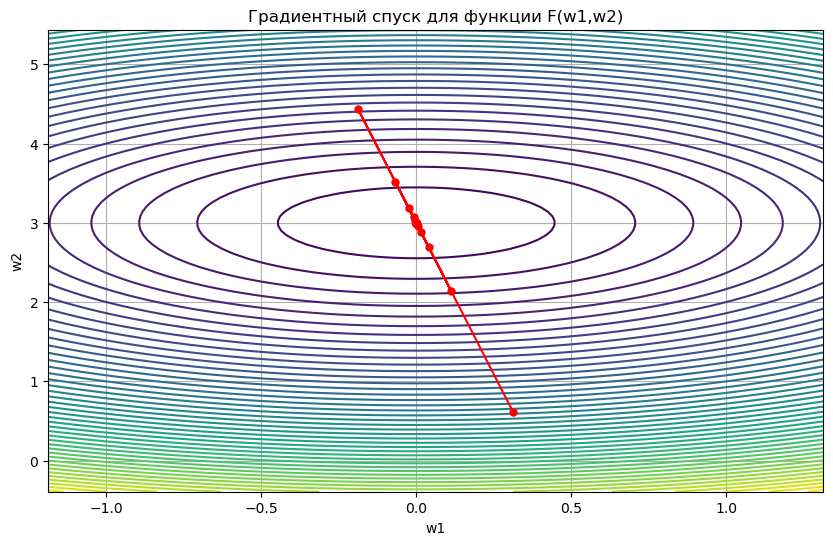

In [105]:
plot_GD_2d(f,w_values)

### 15. Методом градиентного спуска найдите минимум функции четырёх переменных  $F(w_1,w_2,w_3,w_4) ={w_1}^2 + ({w_2}+5*w_3)^2 + (2*w_4 - 3)^2 + 6$.
Указание: Для этого модифицируйте функцию GD_2d в функцию GD_nd применимую для функций n-переменных. Выводить нужно только точку минимума функции, а значения на каждом шаге - нет, т.к. визуализация в данном случае невозможна. Подберите необходимые значения learning_rate = 0.001 и max_iter=10000.

In [108]:
# Определяем функцию F
def F(**kwargs):
    return kwargs['w1']**2 + (kwargs['w2'] + 5 * kwargs['w3'])**2 + (2 * kwargs['w4'] - 3)**2 + 6

In [110]:
# Определяем градиент функции F
def gradient(w):
    dF_dw1 = 2 * w[0]                              # Частная производная по w1
    dF_dw2 = 2 * (w[1] + 5 * w[2])                   # Частная производная по w2
    dF_dw3 = 10 * (w[1] + 5 * w[2])                  # Частная производная по w3
    dF_dw4 = 4 * (w[3] - 3)                      # Частная производная по w4
    return np.array([dF_dw1, dF_dw2, dF_dw3, dF_dw4])  # Возвращаем градиент в виде массива


In [112]:
def GD_nd(gradient, start_point, learning_rate=0.9, max_iter=10000):
    w =start_point  # Начальная точка в виде массива


    for i in range(max_iter):
        grad = gradient(w)  # Вычисляем градиент
        w = w - learning_rate * grad     # Обновляем значения w

    assert (-1e+06 < w).all() and (w < 1e+06).all(), "Расходимость: слишком большой learning_rate, либо неудачно выбрана начальная точка, либо минимум не достигается"
    assert (-1e-04 < gradient(w)).all() and (gradient(w)< 1e-04).all(), "Недостаточно шагов градиентного спуска"

    return w

In [114]:
mn = GD_nd(gradient, start_point=np.ones(4), learning_rate=0.001, max_iter=10000)

mn

array([ 2.02028609e-09,  7.69230769e-01, -1.53846154e-01,  3.00000000e+00])

### 16. Найдите минимум функции c параметрами a и b $F(w_1, w_2, w_3, w_4, a, b) =a*{w_1}^2 + ({w_2}+5*w_3 + b)^2 + (2*w_4 - 3)^2 + 6$. методом градиентного спуска. В качестве значений параметров возьмите $a=5, b =-7$ и $a=-2, b =3$.

Указание: Добавьте в функцию GD_nd параметры a и b, назовите, полученную функцию GD.

In [117]:
def F(w, a, b):
    return a * w[0]**2 + (w[1] + 5 * w[2] + b)**2 + (2 * w[3] - 3)**2 + 6



In [119]:
def gradient(w, a, b):
    dF_dw1 = 2 * w[0] * a                              # Частная производная по w1
    dF_dw2 = 2 * (w[1] + 5 * w[2] + b)                   # Частная производная по w2
    dF_dw3 = 10 * (w[1] + 5 * w[2] + b)                  # Частная производная по w3
    dF_dw4 = 4 * (w[3] - 1.5)                      # Частная производная по w4
    return np.array([dF_dw1, dF_dw2, dF_dw3, dF_dw4])  # Возвращаем градиент в виде массива


In [121]:
def GD(gradient, start_point, learning_rate=0.001, max_iter=10000, a=0, b=0):
    w = start_point  # Начальная точка в виде массива


    for i in range(max_iter):
        grad = gradient(w, a, b)  # Вычисляем градиент
        w -= learning_rate * grad     # Обновляем значения w
        
    assert (-1e+06 < w).all() and (w < 1e+06).all(), "Расходимость: слишком большой learning_rate, либо неудачно выбрана начальная точка, либо минимум не достигается"
    assert (-1e-04 < gradient(w, a, b)).all() and (gradient(w, a, b)< 1e-04).all(), "Недостаточно шагов градиентного спуска"

    return w

In [123]:
min_1 = GD(gradient, start_point=np.zeros(4), learning_rate=0.001, max_iter=10000, a=5, b=-7)

min_1

array([0.        , 0.26923077, 1.34615385, 1.5       ])

In [125]:
min_2 = GD(gradient, start_point=[0., 0., 0., 0.], learning_rate=0.001, max_iter=10000, a=-2, b=3)
min_2

array([ 0.        , -0.11538462, -0.57692308,  1.5       ])

### 17. Создайте класс GradientDiscent, реализующий метод градиентного спуска для функции $F(w_1, w_2, w_3, w_4, a, b) =a*{w_1}^2 + ({w_2}+5*w_3 + b)^2 + (2*w_4 - 3)^2 + 6$. Найдите минимумы при различных a и b.
Указание: Укажите в конструкторе класса атрибуты: w и количество итераций. Добавьте в класс методы gradient_F и GD. Создайте метод fit, который вызывает функцию GD.

In [128]:
class GradientDescent:
    def __init__(self, max_iter=10000):
        self.w = None            # Будет хранить текущие значения переменных w
        self.max_iter = max_iter  # Максимальное количество итераций
        
    # Функция для вычисления градиента
    def gradient_F(self, w, a, b):
        w1, w2, w3, w4 = w
        dF_w1 = 2 * a * w1
        dF_w2 = 2 * (w2 + 5*w3 + b)
        dF_w3 = 2 * (w2 + 5*w3 + b) * 5  # Производная по w3
        dF_w4 = 2 * (2*w4 - 3) * 2       # Производная по w4
        return np.array([dF_w1, dF_w2, dF_w3, dF_w4])

    # Метод для градиентного спуска
    def GD(self, a, b, w_start, learning_rate=0.001, tol=1e-6):
        self.w = w_start  # Начальная точка
        for i in range(self.max_iter):
            grad = self.gradient_F(self.w, a, b)  # Вычисление градиента
            self.w = self.w - learning_rate * grad  # Обновление весов
        assert (-1e+06 < self.w).all() and (self.w < 1e+06).all(), "Расходимость: слишком большой learning_rate, либо неудачно выбрана начальная точка, либо минимум не достигается"
        assert (-1e-04 < grad).all() and (grad < 1e-04).all(), "Недостаточно шагов градиентного спуска"
        return self.w 
    # Метод для запуска процесса минимизации
    def fit(self, a, b):
        w_start = np.zeros(4)  # Начальная точка (можно изменить при необходимости)
        return self.GD(a, b, w_start)
     

In [130]:
gd = GradientDescent(max_iter=10000)

In [132]:
# Находим минимум при a=5, b=-7
min_point_1 = gd.fit(a=5, b=-7)
min_point_1

array([0.        , 0.26923077, 1.34615385, 1.5       ])

In [134]:
# Находим минимум при a=-2, b=3
min_point_2 = gd.fit(a=-2, b=3)
min_point_2

array([ 0.        , -0.11538462, -0.57692308,  1.5       ])

### 18. Модифицируйте класс GradientDiscent в класс GradientDiscent_err, таким образом, чтобы алгоритм градиентного спуcка останавливался, когда искомое значение точки минимума перестаёт существенно меняться. Добавьте в класс атрибут, выводящий количество сделанных шагов.
Указание: Для этого в метод GD добавьте вычисление средней абсолютной ошибки изменения значений между предыдущим и последующим шагом. Если ошибка станет меньше некоторой заранее заданной очень маленькой величины (error_reduction=0.0000001) - выходите из цикла.

In [137]:
class GradientDescent_err:
    def __init__(self, max_iter=10000):
        self.w = None # Будет хранить текущие значения переменных w
        self.max_iter = max_iter  # Максимальное количество итераций
        self.steps = 0  # Количество шагов градиентного спуска

    # Функция для вычисления градиента
    def gradient_F(self, w, a, b):
        w1, w2, w3, w4 = w
        dF_w1 = 2 * a * w1
        dF_w2 = 2 * (w2 + 5*w3 + b)
        dF_w3 = 2 * (w2 + 5*w3 + b) * 5  # Производная по w3
        dF_w4 = 2 * (2*w4 - 3) * 2       # Производная по w4
        return np.array([dF_w1, dF_w2, dF_w3, dF_w4])

    # Метод для градиентного спуска
    def GD(self, a, b, w_start, learning_rate=0.001, tol=1e-6):
        self.w = w_start  # Начальная точка
        previous_w = w_start
        error = 1
        while (error > tol) and (self.steps < self.max_iter):
            previous = self.w
            grad = self.gradient_F(self.w, a, b)  # Вычисление градиента
            self.w = self.w - learning_rate * grad  # Обновление весов
            error = abs(previous - self.w)/len(w_start)
            self.steps += 1
        assert (-1e+06 < self.w).all() and (self.w < 1e+06).all(), "Расходимость: слишком большой learning_rate, либо неудачно выбрана начальная точка, либо минимум не достигается"
        assert (-1e-04 < grad).all() and (grad < 1e-04).all(), "Недостаточно шагов градиентного спуска"
        return self.w 
    # Метод для запуска процесса минимизации
    def fit(self, a, b):
        w_start = np.zeros(4)  # Начальная точка (можно изменить при необходимости)
        return self.GD(a, b, w_start)
     

In [149]:
gd_err = GradientDescent_err(max_iter=10000)

In [153]:
min_point_1 = gd_err.fit(a=5, b=-7)
min_point_1

array([0.        , 0.26923077, 1.34615385, 1.5       ])